In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
mido.Message(type='note_on').type

'note_on'

In [6]:
n = 1250 # 0.8 split -> 1000 samples
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

path ../datasets/drum_midi/50´s Drummer MIDI Files/05 Jazz/07 Kooper 234BPM
  01 4th Multi.mid
  02 4th Multi.mid
  03 8th Hat.mid
  04 8th Perc.mid
  05 16th Toms.mid
  06 16th Toms.mid
  07 16th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/05 Jazz/08 Neodop 226BPM 3-4
  01 16th Ride.mid
  02 16th Ride.mid
  03 8th Hat.mid
  04 8th Ride.mid
  05 8th Multi.mid
  06 8th Multi.mid
  07 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/05 Jazz/09 West Coast 152BPM Brushes
  01 8th Snare.mid
  02 8th Snare.mid
  03 8th Snare.mid
  04 8th Hat.mid
  05 8th Multi.mid
  06 8th Multi.mid
  07 8th Multi.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/05 Jazz/10 Scalis 190BPM 3-4
  01 8th Snare.mid
  02 8th hat.mid
  03 8th Toms.mid
  04 8th Toms.mid
  05 8th Multi.mid
  06 8th Snare.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk
path ../datasets/drum_midi/50´s Drummer MIDI Files/06 Soul - Funk/01 Soul Groove 107BPM
  

path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/02 Blues Rock/02 Sixeight 58BPM
  01 8th Hat Closed.mid
  02 8th Hat Both.mid
  03 8th Hat Closed.mid
  04 8th Hat Both.mid
  05 8th Hat Both.mid
  06 8th Hat Both.mid
  07 8th Hat Closed Multi.mid
  08 8th Hat Both Multi.mid
  09 8th Hat Open.mid
  10 8th Ride Perc.mid
  11 8th Ride Perc.mid
  12 8th Ride Ghost.mid
  13 8th Ride Perc.mid
  14 8th Ride Perc.mid
  15 8th Cym Perc.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/02 Blues Rock/03 Fire 148BPM
  01 8th Hat Closed Perc.mid
  02 8th Hat Closed Perc.mid
  03 8th Hat Closed Perc.mid
  04 8th Hat Closed Perc.mid
  05 8th Hat Closed Perc.mid
  06 8th Hat Closed Perc.mid
  07 8th Hat Both Perc.mid
  08 8th Hat Both.mid
  09 8th Hat Open Perc.mid
  10 8th Ride.mid
  11 8th Ride.mid
  12 8th Ride.mid
  13 8th Ride.mid
  14 8th Toms Perc.mid
  15 2th Snare Perc.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/02 Blues Rock/04 Whiteroom 112BPM

  15 16th Hat Closed Perc.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/04 Soul/09 Wilson 132BPM
  01 8th Hat Closed Perc.mid
  02 8th Hat Closed Perc.mid
  03 8th Hat Closed Perc.mid
  04 8th Hat Closed Perc.mid
  05 8th Hat Closed Perc.mid
  06 8th Hat Closed Perc.mid
  07 8th Hat Both Perc.mid
  08 8th Hat Closed Toms.mid
  09 8th Hat Both Perc.mid
  10 8th Ride Perc.mid
  11 8th Ride Perc.mid
  12 8th Ride Perc.mid
  13 16th Ride Multi.mid
  14 8th Toms Perc.mid
  15 8th Snare Perc.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/04 Soul/10 Stax 120BPM
  01 8th Hat Both.mid
  02 8th Hat Closed.mid
  03 8th Hat Closed.mid
  04 8th Hat Both Perc.mid
  05 8th Hat Both.mid
  06 8th Hat Both Perc.mid
  07 8th Hat Closed Perc.mid
  08 8th Hat Closed Side.mid
  09 8th Hat Closed Multi.mid
  10 16th Hat Both Perc.mid
  11 8th Ride Perc.mid
  12 8th Ride Perc.mid
  13 8th Ride.mid
  14 2th Snare Multi.mid
  15 8th Toms Perc.mid
path ../datasets/drum_midi/6

In [7]:
"""
# dataset

laptop 
[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/05 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/06 Moonglow 140BPM/03 8th Ride.mid"),

pc
[(0,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi//50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
"""
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
x_train.shape

(1250, 160, 10, 1)

In [9]:
m = int(x_train.shape[0] * 0.8)
x_train.shape, m

((1250, 160, 10, 1), 1000)

In [10]:
x_test = x_train[m:]
x_train = x_train[:m]

In [11]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [12]:
latent_dim = 10
epsilon_std = 1.0

In [13]:
vae, encoder, generator = models.build(input_shape, latent_dim)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 10), (None, 10)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/mark/src/pattern-recognition/src/models.py:147: UserWarning: Output "decoder_model-" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model-" during training.
  vae.compile(optimizer='adam')


In [14]:
batch_size = 128
epochs = 1000
params = {'batch_size': batch_size, 'return_y': False}

In [15]:
phase_mod = 0.01
whitening = False

In [19]:
m = 500
useDataGenerator = False
# useDataGenerator = True
callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

x = x_train[:m]
# x = x_train
# i = [0,1, 7,8, 14,15, 399,400]
# x = x_train[i]
# x = np.concatenate([x for _ in range(10)])
print('x:', x.shape)

print('batch_size: %i' % batch_size)
print('update-iterations:', round(epochs * x.shape[0] / batch_size))
if useDataGenerator:
    datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
    history = collections.defaultdict(list)
    n_batches = datagen.__len__()
    for e in range(epochs):
        print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
        for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
            print(' Batch %i/%i' % (batch_i,n_batches))
            x_ = x_batch
            # x_ = datagen.shuffle_3rd_dim(x_)
            # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
            h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
            for k,v in h.history.items(): 
                print(' \\_%s' % k, [round(v_,) for v_ in v])
                history[k].append(v)
            if batch_i >= n_batches:
                break
else:
    h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
    history = h.history

x: (500, 160, 10, 1)
batch_size: 128
update-iterations: 3906
Train on 500 samples, validate on 250 samples
Epoch 1/1000
500/500 [==============================] - 11s 21ms/step - loss: 819.8365 - val_loss: 247.3493
Epoch 2/1000
500/500 [==============================] - 10s 20ms/step - loss: 183.8293 - val_loss: 158.9372
Epoch 3/1000
500/500 [==============================] - 10s 19ms/step - loss: 150.2582 - val_loss: 144.3884
Epoch 4/1000
500/500 [==============================] - 9s 19ms/step - loss: 142.0406 - val_loss: 141.3181
Epoch 5/1000
500/500 [==============================] - 9s 19ms/step - loss: 139.7157 - val_loss: 141.3835
Epoch 6/1000
500/500 [==============================] - 9s 19ms/step - loss: 138.8706 - val_loss: 141.1951
Epoch 7/1000
500/500 [==============================] - 9s 19ms/step - loss: 138.3680 - val_loss: 139.8516
Epoch 8/1000
500/500 [==============================] - 9s 19ms/step - loss: 138.1482 - val_loss: 140.3237
Epoch 9/1000
500/500 [============

500/500 [==============================] - 9s 18ms/step - loss: 92.6615 - val_loss: 102.6606
Epoch 77/1000
500/500 [==============================] - 9s 18ms/step - loss: 92.3162 - val_loss: 104.2622
Epoch 78/1000
500/500 [==============================] - 9s 18ms/step - loss: 92.3845 - val_loss: 102.9917
Epoch 79/1000
500/500 [==============================] - 9s 18ms/step - loss: 91.8485 - val_loss: 102.6504
Epoch 80/1000
500/500 [==============================] - 9s 18ms/step - loss: 91.7382 - val_loss: 103.3878
Epoch 81/1000
500/500 [==============================] - 9s 18ms/step - loss: 92.1193 - val_loss: 102.7052
Epoch 82/1000
500/500 [==============================] - 9s 18ms/step - loss: 91.3847 - val_loss: 102.2049
Epoch 83/1000
500/500 [==============================] - 9s 18ms/step - loss: 90.6178 - val_loss: 103.7540
Epoch 84/1000
500/500 [==============================] - 9s 18ms/step - loss: 91.1393 - val_loss: 107.3506
Epoch 85/1000
500/500 [============================

Epoch 228/1000
500/500 [==============================] - 9s 18ms/step - loss: 72.4652 - val_loss: 121.3141
Epoch 229/1000
500/500 [==============================] - 9s 18ms/step - loss: 72.9979 - val_loss: 117.0176
Epoch 230/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.9365 - val_loss: 119.2401
Epoch 231/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.5212 - val_loss: 120.9853
Epoch 232/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.8522 - val_loss: 119.5926
Epoch 233/1000
500/500 [==============================] - 9s 18ms/step - loss: 72.5433 - val_loss: 118.5219
Epoch 234/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.9377 - val_loss: 119.6070
Epoch 235/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.3043 - val_loss: 121.5603
Epoch 236/1000
500/500 [==============================] - 9s 18ms/step - loss: 71.4656 - val_loss: 118.2906
Epoch 237/1000
500/500 [====

Epoch 304/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.8876 - val_loss: 127.4338
Epoch 305/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.4898 - val_loss: 129.7486
Epoch 306/1000
500/500 [==============================] - 9s 18ms/step - loss: 65.9668 - val_loss: 130.9090
Epoch 307/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.6712 - val_loss: 130.5586
Epoch 308/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.5835 - val_loss: 131.8754
Epoch 309/1000
500/500 [==============================] - 9s 18ms/step - loss: 67.5374 - val_loss: 128.8718
Epoch 310/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.6978 - val_loss: 131.5000
Epoch 311/1000
500/500 [==============================] - 9s 18ms/step - loss: 67.0417 - val_loss: 129.0137
Epoch 312/1000
500/500 [==============================] - 9s 18ms/step - loss: 66.8303 - val_loss: 127.5315
Epoch 313/1000
500/500 [====

Epoch 380/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.3371 - val_loss: 139.2361
Epoch 381/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.7484 - val_loss: 135.7951
Epoch 382/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.0978 - val_loss: 141.5511
Epoch 383/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.0354 - val_loss: 138.6154
Epoch 384/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.9650 - val_loss: 140.5395
Epoch 385/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.3186 - val_loss: 140.5999
Epoch 386/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.8588 - val_loss: 140.6862
Epoch 387/1000
500/500 [==============================] - 9s 18ms/step - loss: 62.1368 - val_loss: 136.7485
Epoch 388/1000
500/500 [==============================] - 9s 18ms/step - loss: 63.3017 - val_loss: 136.4552
Epoch 389/1000
500/500 [====

Epoch 456/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.9186 - val_loss: 144.6799
Epoch 457/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.1035 - val_loss: 144.4552
Epoch 458/1000
500/500 [==============================] - 9s 18ms/step - loss: 58.8456 - val_loss: 145.5841
Epoch 459/1000
500/500 [==============================] - 9s 18ms/step - loss: 58.9457 - val_loss: 146.6426
Epoch 460/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.1195 - val_loss: 145.9449
Epoch 461/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.3913 - val_loss: 145.5972
Epoch 462/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.8913 - val_loss: 149.9724
Epoch 463/1000
500/500 [==============================] - 9s 18ms/step - loss: 60.6973 - val_loss: 146.6420
Epoch 464/1000
500/500 [==============================] - 9s 18ms/step - loss: 59.0197 - val_loss: 145.6091
Epoch 465/1000
500/500 [====

Epoch 532/1000
500/500 [==============================] - 9s 18ms/step - loss: 57.2637 - val_loss: 149.4500
Epoch 533/1000
500/500 [==============================] - 9s 18ms/step - loss: 56.0098 - val_loss: 150.2410
Epoch 534/1000
500/500 [==============================] - 9s 18ms/step - loss: 56.9524 - val_loss: 149.9653
Epoch 535/1000
500/500 [==============================] - 9s 18ms/step - loss: 56.3810 - val_loss: 153.7661
Epoch 536/1000
500/500 [==============================] - 9s 18ms/step - loss: 56.4609 - val_loss: 155.1976
Epoch 537/1000
500/500 [==============================] - 9s 18ms/step - loss: 57.0192 - val_loss: 152.7285
Epoch 538/1000
500/500 [==============================] - 9s 18ms/step - loss: 57.2555 - val_loss: 154.6508
Epoch 539/1000
500/500 [==============================] - 9s 18ms/step - loss: 57.5658 - val_loss: 154.2604
Epoch 540/1000
500/500 [==============================] - 9s 18ms/step - loss: 58.0434 - val_loss: 153.4213
Epoch 541/1000
500/500 [====

Epoch 608/1000
500/500 [==============================] - 9s 18ms/step - loss: 55.7952 - val_loss: 156.7681
Epoch 609/1000
500/500 [==============================] - 9s 18ms/step - loss: 55.1589 - val_loss: 157.8284
Epoch 610/1000
500/500 [==============================] - 9s 18ms/step - loss: 56.1493 - val_loss: 157.7903
Epoch 611/1000
500/500 [==============================] - 9s 18ms/step - loss: 55.1541 - val_loss: 155.6922
Epoch 612/1000
500/500 [==============================] - 9s 18ms/step - loss: 54.6862 - val_loss: 155.7629
Epoch 613/1000
500/500 [==============================] - 9s 18ms/step - loss: 54.2282 - val_loss: 161.4329
Epoch 614/1000
500/500 [==============================] - 9s 18ms/step - loss: 54.1586 - val_loss: 160.9859
Epoch 615/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.9447 - val_loss: 161.4672
Epoch 616/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.9326 - val_loss: 158.2604
Epoch 617/1000
500/500 [====

Epoch 684/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.4757 - val_loss: 165.5498
Epoch 685/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.8697 - val_loss: 162.6324
Epoch 686/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.5298 - val_loss: 168.7259
Epoch 687/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.8714 - val_loss: 164.4419
Epoch 688/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.9370 - val_loss: 165.0891
Epoch 689/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.3055 - val_loss: 162.5623
Epoch 690/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.2441 - val_loss: 168.0852
Epoch 691/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.4796 - val_loss: 163.2217
Epoch 692/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.5380 - val_loss: 161.1627
Epoch 693/1000
500/500 [====

Epoch 760/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.1303 - val_loss: 169.7511
Epoch 761/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.7285 - val_loss: 175.0962
Epoch 762/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.9191 - val_loss: 173.4230
Epoch 763/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.6070 - val_loss: 169.2720
Epoch 764/1000
500/500 [==============================] - 9s 18ms/step - loss: 53.2018 - val_loss: 173.6781
Epoch 765/1000
500/500 [==============================] - 9s 18ms/step - loss: 52.1806 - val_loss: 170.0334
Epoch 766/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.5928 - val_loss: 170.2613
Epoch 767/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.1573 - val_loss: 175.5980
Epoch 768/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.1559 - val_loss: 173.4973
Epoch 769/1000
500/500 [====

Epoch 836/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.6276 - val_loss: 176.1259
Epoch 837/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.3418 - val_loss: 179.0033
Epoch 838/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.7962 - val_loss: 180.1127
Epoch 839/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.5091 - val_loss: 176.8686
Epoch 840/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.2757 - val_loss: 176.8462
Epoch 841/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.8594 - val_loss: 177.2621
Epoch 842/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.2508 - val_loss: 175.2437
Epoch 843/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.6384 - val_loss: 169.1781
Epoch 844/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.9653 - val_loss: 167.5033
Epoch 845/1000
500/500 [====

Epoch 912/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.3170 - val_loss: 175.0190
Epoch 913/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.0492 - val_loss: 178.0315
Epoch 914/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.7616 - val_loss: 177.1675
Epoch 915/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.2446 - val_loss: 173.8662
Epoch 916/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.5471 - val_loss: 177.8908
Epoch 917/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.3976 - val_loss: 177.3366
Epoch 918/1000
500/500 [==============================] - 9s 18ms/step - loss: 51.6223 - val_loss: 182.0393
Epoch 919/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.4635 - val_loss: 177.1610
Epoch 920/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.3364 - val_loss: 174.4663
Epoch 921/1000
500/500 [====

Epoch 988/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.8137 - val_loss: 180.6738
Epoch 989/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.5770 - val_loss: 182.0415
Epoch 990/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.0184 - val_loss: 183.0138
Epoch 991/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.1421 - val_loss: 183.8328
Epoch 992/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.0495 - val_loss: 181.9956
Epoch 993/1000
500/500 [==============================] - 9s 18ms/step - loss: 48.9164 - val_loss: 180.6638
Epoch 994/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.3026 - val_loss: 181.2367
Epoch 995/1000
500/500 [==============================] - 9s 18ms/step - loss: 49.7247 - val_loss: 185.5526
Epoch 996/1000
500/500 [==============================] - 9s 18ms/step - loss: 50.0067 - val_loss: 183.4216
Epoch 997/1000
500/500 [====

In [18]:
fn = config.model_dir + 'final_model-500-.h5'

In [21]:
# for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
#     model.save_weights(dn + prefix + suffix + '.h5', "w")
vae.save_weights(fn, "w")

In [22]:
# io.save_dict(history)
io.save_dict('../logs/','train_loss-final_model-500', history)

'../logs/train_loss-final_model-500.csv'

(0, 150)

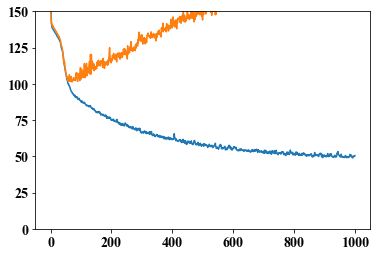

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylim(0,150)

In [19]:
# vae.load_weights(fn)

ValueError: You are trying to load a weight file containing 7 layers into a model with 2 layers.

In [25]:
# vae2 = vae

In [26]:
x.shape

(500, 160, 10, 1)

m (50, 10, 1)


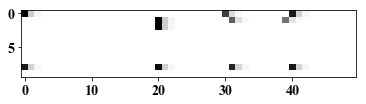

m (50, 10, 1)


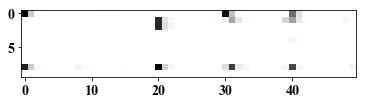

m (50, 10, 1)


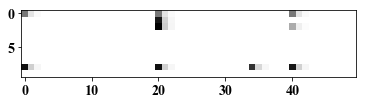

m (50, 10, 1)


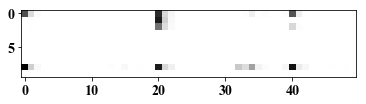

In [27]:
i,j = 240, 30
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [28]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [29]:
x.shape

(500, 160, 10, 1)

m (30, 10)


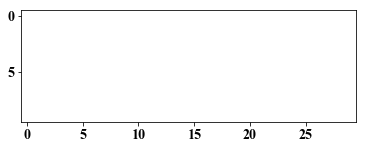

In [30]:
# min: these pixels are 'always' active
m = x.min(axis=0)
plot.multi(m[:30,:,0])

m (30, 10)


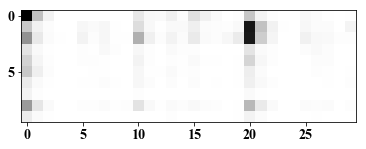

In [31]:
# mean
m = x.mean(axis=0)
plot.single(m[:30,:,0])

## Style transfer

In [32]:
m = 100
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(100, 10)

In [34]:
decoder = generator

original
m (160, 10, 1)


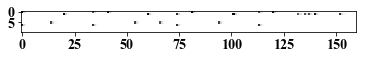

(11, 160, 10, 1) [ 0.03906039 -0.02240084 -0.01962583  0.0207846   0.00321193]
identity
m (160, 10, 1)


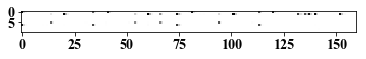

mutations
m (160, 10, 1)


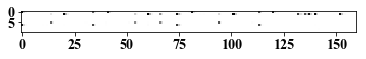

m (160, 10, 1)


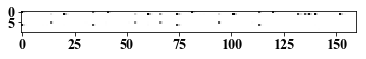

m (160, 10, 1)


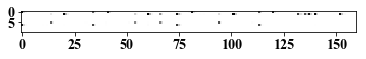

m (160, 10, 1)


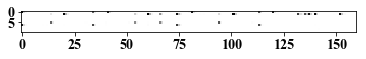

In [35]:
i = 100
amt = 0.3
print('original')
plot.single(x_train[i])
z = encoder.predict(x_train[i:i+1])
zs = [ z[0].copy() for _ in range(latent_dim) ]
for i,z_ in enumerate(zs):
    z_[i] = z_[i] + amt
generated = decoder.predict(np.concatenate([z[:1], zs]))
print(generated.shape, z[0,:5])
print('identity')
plot.single(generated[0]) 
print('mutations')
plot.single(generated[1])
plot.single(generated[2])
plot.single(generated[3])
plot.single(generated[4])

In [36]:
mido.MidiFile()

<midi file None type 1, 0 tracks, 0 messages>

In [37]:
# utils.clear_dir(config.export_dir)
for i, sample in enumerate(generated):
    s = midi.MultiTrack.from_array(sample)
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'generated-' + str(i))

 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.780208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333334
 |  4.0


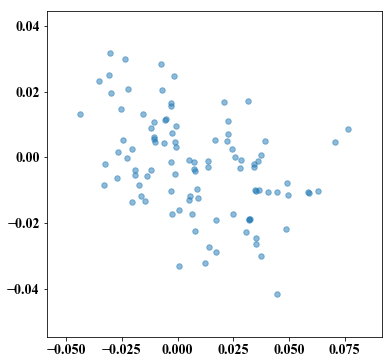

In [38]:
# y_test = range(x_train_encoded.shape[0])
y_test = np.concatenate([list(range(n)) for _ in range(int(m/n)+1)])[:m] / n
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], alpha=0.5, s=30) # c=y_test, 

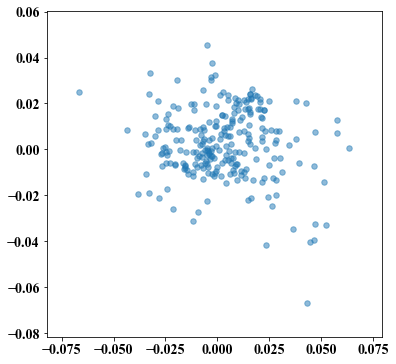

In [39]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], alpha=0.5, s=30) # , c=y_test
# plt.colorbar()

In [54]:
# x_decoded[0].reshape(150,3)

In [55]:
x_train.shape

(1000, 160, 10, 1)

(10,) [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


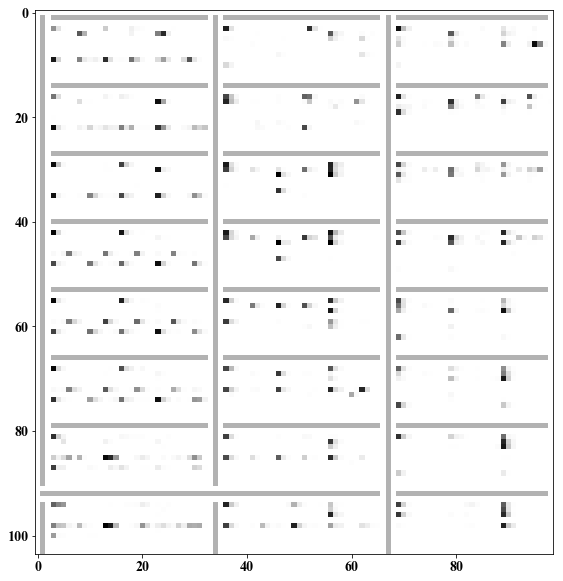

In [82]:
min_y = 0.01
max_y = 0.5
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,
       latent_indices=(-2, -1),
       n=8,
       m=3,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y,
       max_y=max_y)

(10,) [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


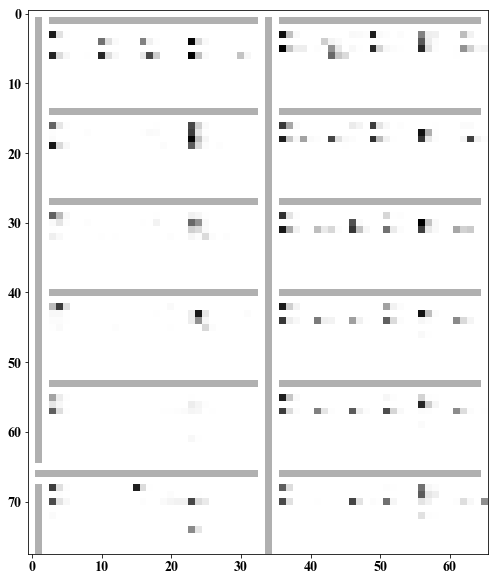

In [84]:
min_y2 = max_y
plot.latent(generator, batch_size, latent_dim,
       x_encoded=0.5,   
       latent_indices=(-3, -1),            
       n=6,
       m=2,
       crop_size=30,
       margin_top=1,
       margin_left=1,
       min_x=0.05,
       max_x=0.95,
       min_y=min_y2,
       max_y=0.95)

In [58]:
a = [0,11,100,399]
# utils.clear_dir(config.export_dir)
for i in a:
    s = midi.MultiTrack.from_array(x_train[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_true_' + str(i))
    
    s = midi.MultiTrack.from_array(y[i])
    mid = midi.decode.track(context, s, transpose=0)
    io.export_midifile(mid, config.export_dir + 'y_pred' + str(i))    

 [INFO] : 
 |  len, max_t
 |  3.8052083333333324
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.8052083333333324
 |  4.0
 [INFO] : 
 |  len, max_t
 |  4.005208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  4.005208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.830208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.9052083333333334
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.9052083333333334
 |  4.0


# Style transfer
rock ~ funk

In [59]:
[(a,b) for a,b in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM/01 8th Snare.mid ../datasets/drum_midi/50´s Drummer MIDI Files/03 Traditional Pop/01 Fly High 115BPM/01 8th Hat.mid ../datasets/drum_midi/50´s Drummer MIDI Files/02 Blues/06 Vidar Vega 70BPM/01 8th Hat.mid
m (80, 10, 1)


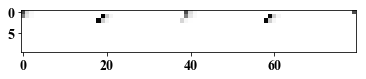

m (80, 10, 1)


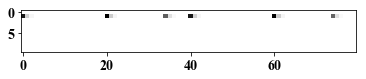

m (80, 10, 1)


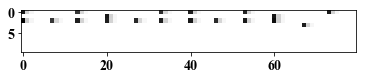

In [60]:
i,j,k = 21, 140, 105 # 210, 79
m = 80
sample_size = 10
print(labels[i], labels[j], labels[k])
plot.single(x_train[i,:m])
plot.single(x_train[j,:m])
plot.single(x_train[k,:m])

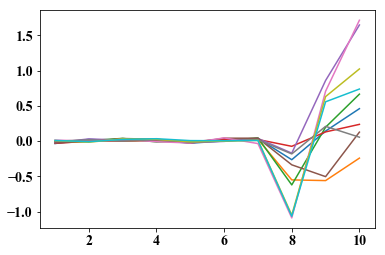

In [61]:
latent_vectors = encoder.predict(x_train[:250])
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

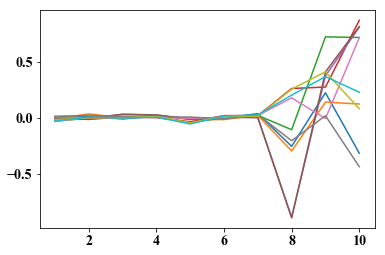

In [62]:
for l in range(sample_size):
    plt.plot(indices, latent_vectors[l + j])
# plt.ylim((-1,1))

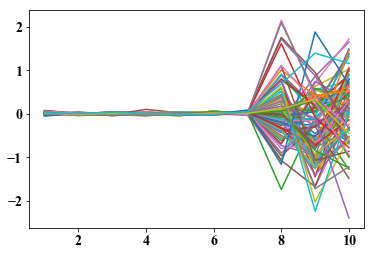

In [63]:
indices = np.arange(latent_vectors.shape[-1]) + 1
for l in range(100):
    plt.plot(indices, latent_vectors[l + i])
# plt.ylim((-1,1))

In [64]:
a = x_train[i:i+sample_size]
b = x_train[j:j+sample_size]
c = x_train[k:k+sample_size]

In [65]:
t = models.extract_transformation(encoder, a, b)
t

array([ 2.5731232e-04,  8.1308885e-04, -7.3933769e-03,  1.1862516e-03,
       -5.9481524e-03, -7.5742137e-03, -3.7584454e-04,  3.6761329e-01,
        5.9060514e-02, -2.7932969e-01], dtype=float32)

m (80, 10, 1)


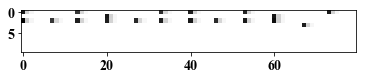

m (80, 10, 1)


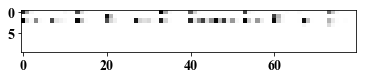

In [66]:
c_ = models.transfer_style(encoder, generator, a, b, c)
plot.single(c[0,:m])
plot.single(c_[0,:m])

In [67]:
d = {'original':c, 'generated':c_, 'a':a, 'b':b}
for name,v in d.items():
    mid = midi.decode.track(context, v[0], name=name)
    mid.tracks[0].name = name
    io.export_midifile(mid, config.export_dir + 'style_transfer-' + name)

 [INFO] : 
 |  len, max_t
 |  3.8552083333333336
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.8552083333333336
 |  4.0
 [INFO] : 
 |  len, max_t
 |  4.005208333333333
 |  4.0
 [INFO] : 
 |  len, max_t
 |  3.8802083333333335
 |  4.0


In [68]:
from sklearn.decomposition import PCA
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [69]:
pca = PCA(n_components=3)

In [70]:
pca_result = pca.fit_transform(latent_vectors)
pca_result.shape

(250, 3)

In [71]:
[round(v,3) for v in pca.explained_variance_ratio_], round(sum(pca.explained_variance_ratio_[:2]),2)

([0.374, 0.343, 0.282], 0.72)

In [72]:
pca.components_

array([[ 2.40024477e-02, -2.62175477e-03, -4.38176235e-03,
        -7.68975914e-03,  5.89664746e-03,  1.21662915e-02,
        -1.19072665e-02,  6.00400865e-02, -9.49188352e-01,
         3.07328880e-01],
       [ 9.08057205e-03, -2.14494602e-03, -1.20163579e-02,
        -5.19612618e-03,  4.67006722e-03,  5.65732410e-03,
        -7.24465353e-04,  5.26081145e-01, -2.31200978e-01,
        -8.18212807e-01],
       [-5.97884646e-03, -4.17443924e-03,  8.38783197e-03,
         3.06118676e-03,  7.00823776e-03,  2.66267522e-03,
         4.97066183e-03, -8.48079860e-01, -2.11116627e-01,
        -4.85774010e-01]], dtype=float32)

In [73]:
pca.singular_values_

array([12.868518, 12.324018, 11.185346], dtype=float32)

2 best dims


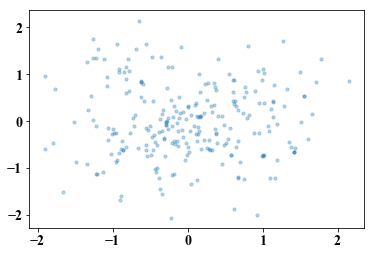

In [74]:
print('2 best dims')
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.3, s=10) # c=labels
# plt.ylim((-1,1))

2 best dims, 3 classes


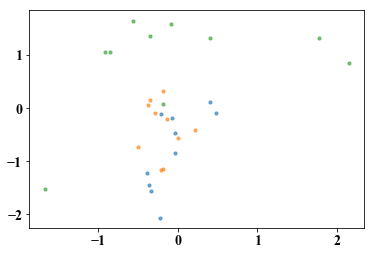

In [75]:
print('2 best dims, 3 classes')
for i_ in [i,j,k]:
    plt.scatter(pca_result[i_:i_+sample_size,0], pca_result[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))

In [76]:
# import ggplot
# chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
#         + geom_point(size=75,alpha=0.8) \
#         + ggtitle("First and Second Principal Components colored by digit")
# chart

In [77]:
from sklearn.manifold import TSNE

In [78]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)

In [79]:
# TODO shuffle data?
tsne_results = tsne.fit_transform(latent_vectors)
tsne_results.shape

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.004s...
[t-SNE] Computed neighbors for 250 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 0.490373
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.383587
[t-SNE] Error after 500 iterations: 0.528376


(250, 2)

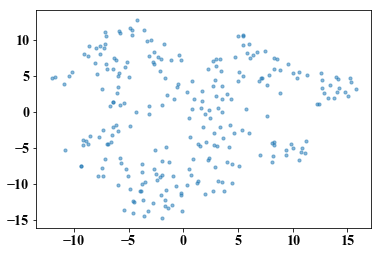

In [80]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.5, s=10)

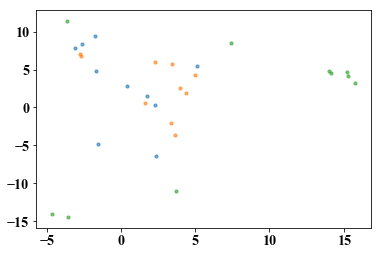

In [81]:
for i_ in [i,j,k]:
    plt.scatter(tsne_results[i_:i_+sample_size,0], tsne_results[i_:i_+sample_size,1], alpha=0.6, s=10) # c=labels
# plt.ylim((-1,1))